# Baseline Model
Here we try and build a simple baseline model to have a frame of reference for others

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures
# io related
from skimage.io import imread
import os
from glob import glob
# not needed in Kaggle, but required in Jupyter
%matplotlib inline 

In [17]:
base_dir = '../input/'
train_df = pd.read_csv(os.path.join(base_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(base_dir, 'test.csv'))
train_df.sample(3)

,id,url,landmark_id
258180,3658e24b0aca29cf,https://lh6.googleusercontent.com/-NgweOByFW0M...,12257
635936,e6515f6584dcd311,http://lh5.ggpht.com/-Zyr6h4z3gv8/Tqbhv5vvw3I/...,6043
33944,7a3ca6731d681a73,https://lh5.googleusercontent.com/-V0MEp9hlm6A...,5739


# Overview
We see a few wide outliers and quite a few images with single examples

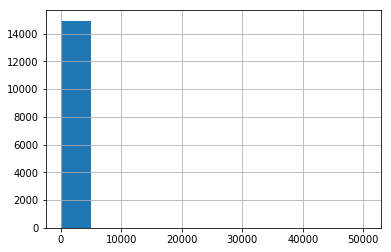

In [18]:
train_df['landmark_id'].value_counts().hist()

In [19]:
submit_df = pd.read_csv(os.path.join(base_dir, 'sample_submission.csv'))
# take the most frequent label
def_guess = train_df['landmark_id'].value_counts()/train_df['landmark_id'].value_counts().sum()
def_guess.index[0], def_guess.values[0]

(9633, 0.04109045581778064)

In [20]:
submit_df['landmarks'] = '%d %2.2f' % (def_guess.index[0], def_guess.values[0])
submit_df.to_csv('submission.csv', index=False)
submit_df.sample(2)

,id,landmarks
82810,b4728f575c386049,9633 0.04
39756,568dbaa4a10bce30,9633 0.04


# Random Guessing
Here we do some random guessing normalized by the frequency in the training set

In [25]:
np.random.seed(2018)
r_idx = lambda : np.random.choice(def_guess.index, p = def_guess.values)

In [29]:
%%time
r_score = lambda idx: '%d %2.4f' % (def_guess.index[idx], def_guess.values[idx])
submit_df['landmarks'] = submit_df.id.map(lambda _: r_score(r_idx()))
submit_df.to_csv('rand_submission.csv', index=False)
submit_df.sample(2)

CPU times: user 26.7 s, sys: 12 ms, total: 26.7 s
Wall time: 26.7 s


In [30]:
submit_df.sample(2)

,id,landmarks
107723,ea570492cb19411a,1463 0.0000
87143,bdbf8b746d5fe0ad,13099 0.0002
